In [1]:
from dredFISH.Analysis.TissueGraph import *
from dredFISH.Visualization.Viz import *
import matplotlib.pyplot as plt 

#### Load data

In [28]:
# TMG = TissueMultiGraph('TMG_example_2.pkl')
TMG = TissueMultiGraph('/home/rwollman/MixedSupervizedAndUnsupervized.pkl')

The difference between the 2 color = 52.88009898346556


(-1.0, 1.0)

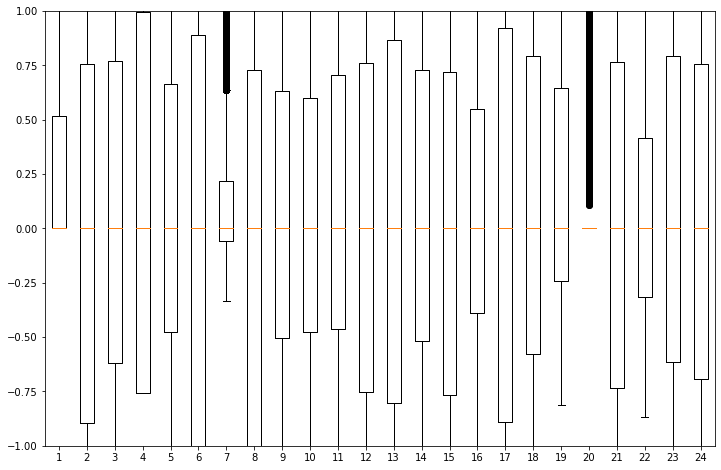

In [30]:
# PNMF = TMG.normalize_data(norm_cell=False, norm_bit=True)
PNMF = TMG.Layers[0].feature_mat
plt.figure(figsize = (12,8))
ax = plt.gca()
ax.boxplot(PNMF);
rng= (-1,1)
ax.set_ylim(rng)

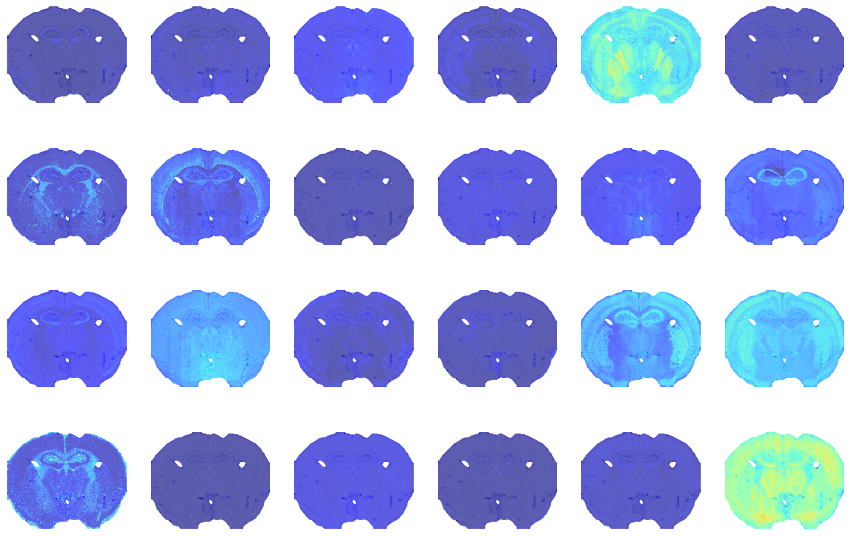

In [24]:
gs = GridSpec(4,6)
ViewPNMF = View(TMG,name = 'All PNMF')
ViewPNMF.figsize = (15,10)
PNMF = TMG.Layers[0].feature_mat
for i in range(24): 
    to_plot = np.clip(PNMF[:,i],rng[0],rng[1])
    ViewPNMF.add_panel(Colorpleth(to_plot,name = f"PNMF_i",pos = gs[i]))
    ViewPNMF.Panels[i].clrmp='jet'

ViewPNMF.show()    

In [15]:
TMG.Layers[1].Type2

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 3, 2, 4, 1, 0, 1, 4, 2, 4, 1, 1, 4,
       4, 1, 0, 0, 4, 0, 1, 4, 4, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 4, 4, 4,
       1, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4,
       1, 4, 4, 4, 0, 0, 4, 5, 4, 4, 1, 1, 0, 1, 1, 0])

cannot copy attribute: __weakref__


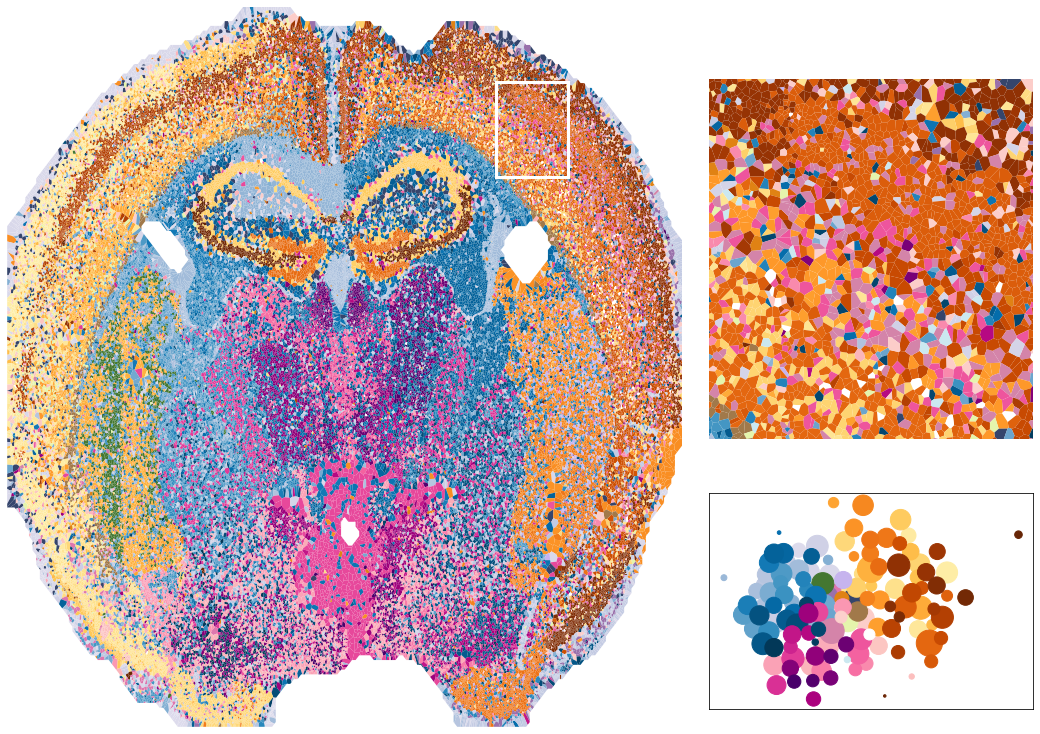

In [10]:
Vcellmap = View(TMG,name = 'cell map with zoom panel')
Vcellmap.figsize = (15,10) 
P_typemap = TypeMap(pos = (0,0,0.625,1))
P_typemap.cmap_list = ['YlOrBr','RdPu','PuBu','YlGn','PiYG','PRGn','cividis','PuOr','cubehelix','RdPu']
Vcellmap.add_panel(P_typemap)
Vcellmap.add_panel(LegendWithCircles(P_typemap,name = 'legend',pos = (0.65,0.025,0.3,0.3)))
Vcellmap.add_panel(Zoom(P_typemap,zoom_coords = np.array([2500,0,1000,1000]),name='zoom',pos = (0.65,0.4,0.3,0.5)))
Vcellmap.show()   

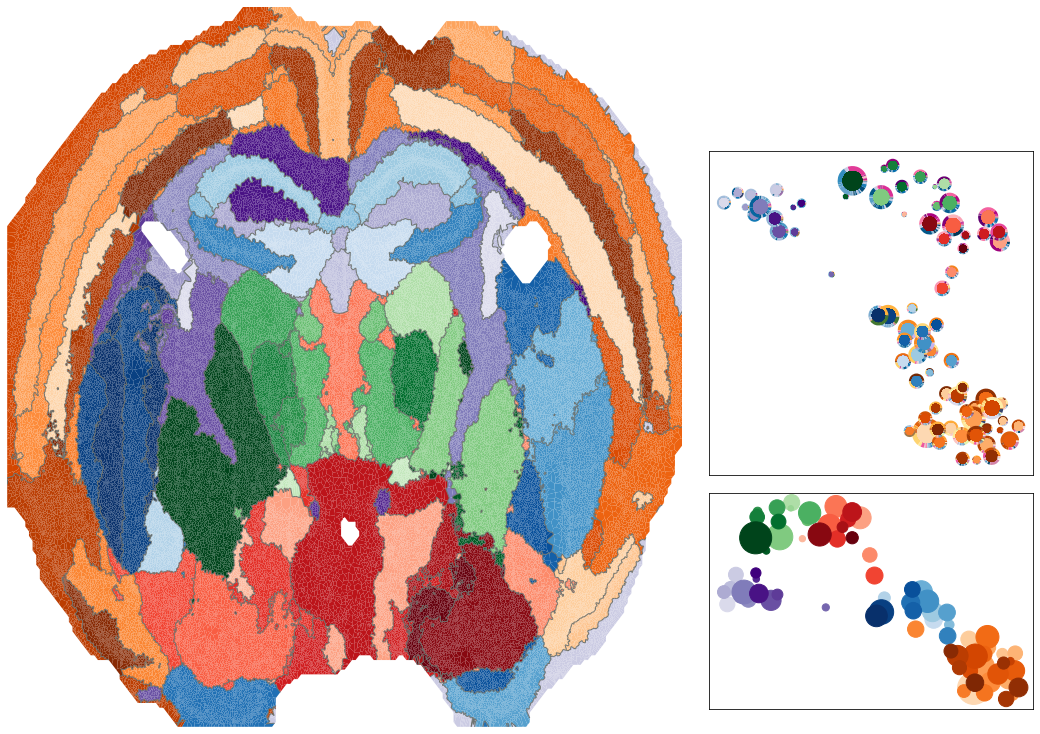

In [13]:
Vregionmap = View(TMG,name = 'region map with circle legend')
Vregionmap.figsize = (15,10) 
P_regionmap = TypeMapWithLines(pos = (0,0,0.625,1))
P_regionmap.cmap_list = ['Oranges','Purples','Blues','Reds','Greens','cividis']
Vregionmap.add_panel(P_regionmap)
Vregionmap.add_panel(LegendWithCircles(P_regionmap,name = 'legend',pos = (0.65,0.025,0.3,0.3)))
P_legend = LegendWithCirclesAndWedges(P_regionmap,P_typemap,name = 'legend2',pos=(0.65,0.35,0.3,0.45))
Vregionmap.add_panel(P_legend)
Vregionmap.show()

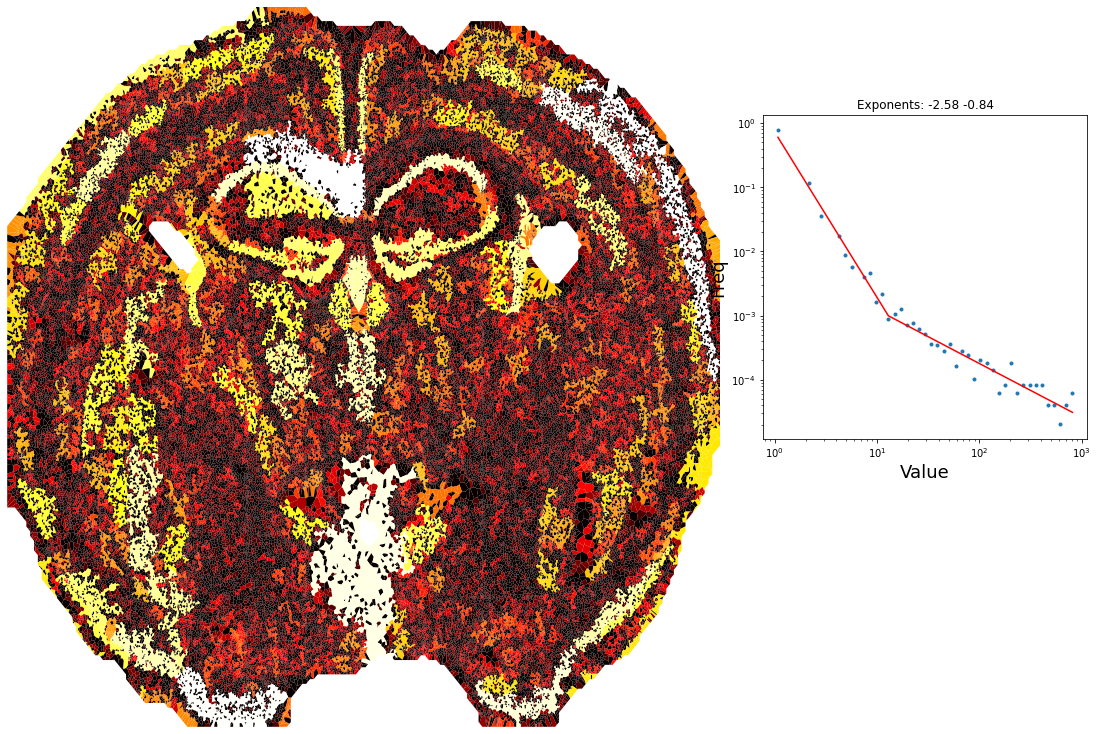

In [15]:
Viz =  View(TMG,name = 'region map with circle legend')
Viz.figsize = (15,10) 
Viz.add_panel(IsoZones(pos = (0,0,0.66,1)))
P_loglog = LogLogPlot(TMG.Layers[1].node_size,pos = (0.7,0.4,0.3,0.45))
Viz.add_panel(P_loglog)
Viz.show()
